In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = 'VR_bugHEMveto'

In [3]:
# Signal
#sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [ ]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [ ]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [ ]:
# sig_histo / bkg_histo is a dictionary of variables
print(bkg_histo.keys())

## Signal

In [ ]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [ ]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

In [ ]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [ ]:
table = eff_cutflow
table.columns = cutnames

In [ ]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

In [ ]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [ ]:
table = cts_cutflow
table.columns = cutnames

In [ ]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

In [ ]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

In [ ]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [ ]:
table = raw_cutflow
table.columns = cutnames

In [ ]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

In [ ]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

### Plot the efficiency

In [ ]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

In [ ]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [7]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
Multiboson,0.00062685,0.00000359,0.00000181,0.00000165,0.00000158,0.00000154,0.00000102,0.00000029
DY-M4to50,0.00002500,0.00000030,0.00000016,0.00000016,0.00000016,0.00000016,0.00000008,0.00000002
SingleTop,0.00022276,0.00000179,0.00000067,0.00000061,0.00000061,0.00000060,0.00000034,0.00000013
QCD,0.00000216,0.00000002,0.00000001,0.00000001,0.00000001,0.00000000,0.00000000,0.00000000
TTX,0.00127165,0.00001893,0.00000496,0.00000487,0.00000485,0.00000478,0.00000002,0.00000176
ZGamma,0.00031387,0.00000273,0.00000155,0.00000138,0.00000138,0.00000138,0.00000098,0.00000020
TTbar,0.00041437,0.00000577,0.00000204,0.00000191,0.00000188,0.00000187,0.00000117,0.00000043
ZJets,0.00231908,0.00001373,0.00000798,0.00000750,0.00000741,0.00000734,0.00000501,0.00000172
DY-M50,0.00037497,0.00000380,0.00000192,0.00000182,0.00000182,0.00000181,0.00000116,0.00000048
WJets,0.00096843,0.00000488,0.00000264,0.00000252,0.00000250,0.00000247,0.00000155,0.00000051


In [8]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_bugHEMveto/Cutflow/Efficiency//Background_Efficiency.csv


In [9]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
Multiboson,"4,368.85",25.02,12.61,11.51,10.99,10.77,7.11,2.04
DY-M4to50,356.19,4.34,2.29,2.27,2.27,2.25,1.09,0.23
SingleTop,"3,464.63",27.85,10.38,9.48,9.48,9.40,5.23,2.05
QCD,"46,462.37",354.91,109.98,109.98,109.98,102.61,0.00,0.00
TTX,394.77,5.88,1.54,1.51,1.50,1.49,0.01,0.55
ZGamma,"1,609.71",14.00,7.93,7.06,7.06,7.06,5.02,1.00
TTbar,"20,616.45",286.93,101.65,94.96,93.46,92.91,57.97,21.59
ZJets,"49,631.76",293.85,170.81,160.57,158.48,157.08,107.14,36.80
DY-M50,"4,144.21",41.95,21.21,20.17,20.16,20.06,12.86,5.26
WJets,"169,595.37",855.16,463.01,440.59,437.29,433.20,271.73,90.08


In [10]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_bugHEMveto/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [11]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
Multiboson,23293,150,81,76,74,72,47,18
DY-M4to50,24283,320,169,168,168,163,76,26
SingleTop,43888,302,109,96,96,94,49,16
QCD,29697,160,43,43,43,36,0,0
TTX,130908,1800,537,515,501,486,310,122
ZGamma,6251,68,35,31,31,31,17,3
TTbar,485374,6665,2344,2183,2145,2131,1321,495
ZJets,693237,5381,3065,2956,2947,2897,1670,570
DY-M50,258626,3054,1219,1196,1195,1163,578,238
WJets,1115573,6075,2761,2689,2682,2596,1257,469


In [12]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_bugHEMveto/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [13]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 159.60


In [14]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['Vtx CosCollinear < 0']).transpose(), pd.DataFrame(bkg_cts_raw_df['Vtx CosCollinear < 0']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Multiboson,DY-M4to50,SingleTop,QCD,TTX,ZGamma,TTbar,ZJets,DY-M50,WJets,Total
Weighted Counts,2.04,0.23,2.05,0.00,0.55,1.00,21.59,36.80,5.26,90.08,159.60
Raw Counts,18.00,26.00,16.00,0.00,122.00,3.00,495.00,570.00,238.00,469.00,"1,957.00"


## Data

In [15]:
pd.options.display.float_format = '{:,.1f}'.format
data_cts_df = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
data_cts_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
data_2018_Data_MET_UL18_MET_Run2018D,"304,560.0","2,366.0",911.0,791.0,786.0,777.0,427.0,150.0
data_2018_Data_MET_UL18_MET_Run2018C,"68,834.0",561.0,211.0,181.0,181.0,178.0,106.0,46.0
data_2018_Data_MET_UL18_MET_Run2018B,"60,604.0",390.0,156.0,130.0,128.0,126.0,73.0,32.0
data_2018_Data_MET_UL18_MET_Run2018A,"118,598.0",802.0,273.0,226.0,224.0,220.0,118.0,53.0
Total,"552,596.0","4,119.0","1,551.0","1,328.0","1,319.0","1,301.0",724.0,281.0


In [16]:
pd.options.display.float_format = '{:,.1f}'.format

data_composition = pd.DataFrame(data_cts_df['Vtx CosCollinear < 0']).transpose()

data_composition = data_composition.rename(index={'Vtx CosCollinear < 0': 'Data Yield'})
data_composition = data_composition.rename(columns={'data_2018_Data_MET_UL18_MET_Run2018C': 'Run2018C', \
                                                   'data_2018_Data_MET_UL18_MET_Run2018B': 'Run2018B', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018A': 'Run2018A', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018D': 'Run2018D'
                                                   })

data_composition = data_composition.reindex(sorted(data_composition.columns), axis=1)

data_composition

,Run2018A,Run2018B,Run2018C,Run2018D,Total
Data Yield,53.0,32.0,46.0,150.0,281.0


In [17]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections                 1.8
n(good vertex) > 0            2.2
No b-tagged jets              1.7
Leading jet |eta| < 2.4       1.5
Leading jet pT > 80 GeV       1.6
dPhi(MET,leading jet) > 1.5   1.6
dPhi(MET,all jets) > 0.75     1.5
Vtx CosCollinear < 0          1.8
Name: Total, dtype: float64

In [18]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                 552,596.0
n(good vertex) > 0              4,119.0
No b-tagged jets                1,551.0
Leading jet |eta| < 2.4         1,328.0
Leading jet pT > 80 GeV         1,319.0
dPhi(MET,leading jet) > 1.5     1,301.0
dPhi(MET,all jets) > 0.75         724.0
Vtx CosCollinear < 0              281.0
Name: Total, dtype: float64

In [19]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections                 300,644.3
n(good vertex) > 0              1,909.9
No b-tagged jets                  901.4
Leading jet |eta| < 2.4           858.1
Leading jet pT > 80 GeV           850.7
dPhi(MET,leading jet) > 1.5       836.8
dPhi(MET,all jets) > 0.75         468.2
Vtx CosCollinear < 0              159.6
Name: Total, dtype: float64

/tmp/ipykernel_1773739/3130413513.py:17: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


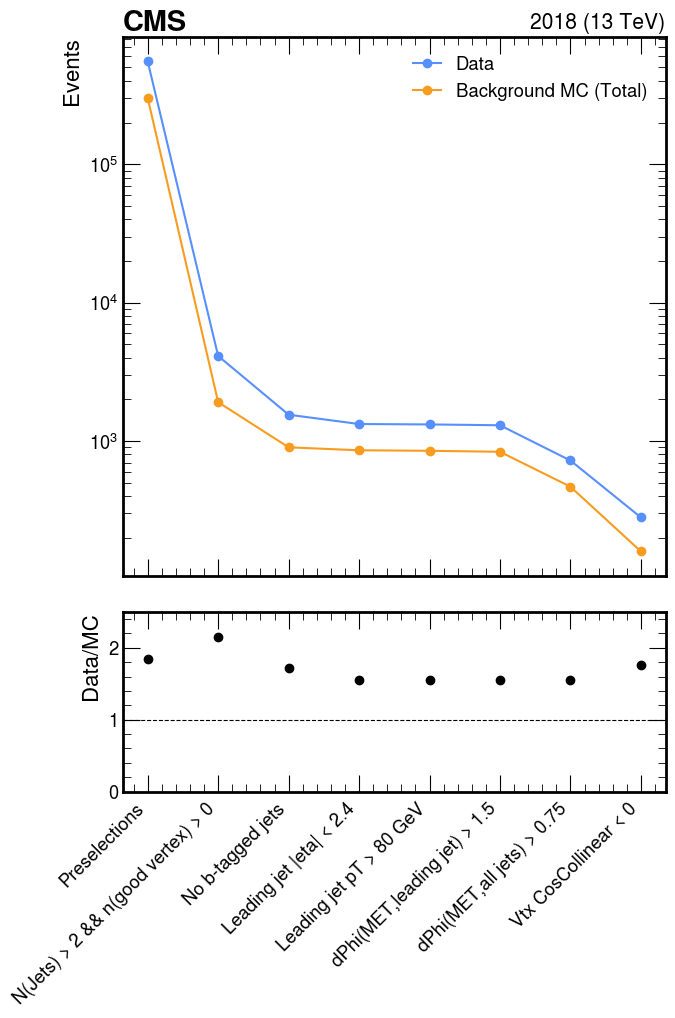

In [20]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')

plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,2.5])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')



### Plot the efficiency

Saved: ./plots/VR_bugHEMveto/cutflow//Cutflow_background.png


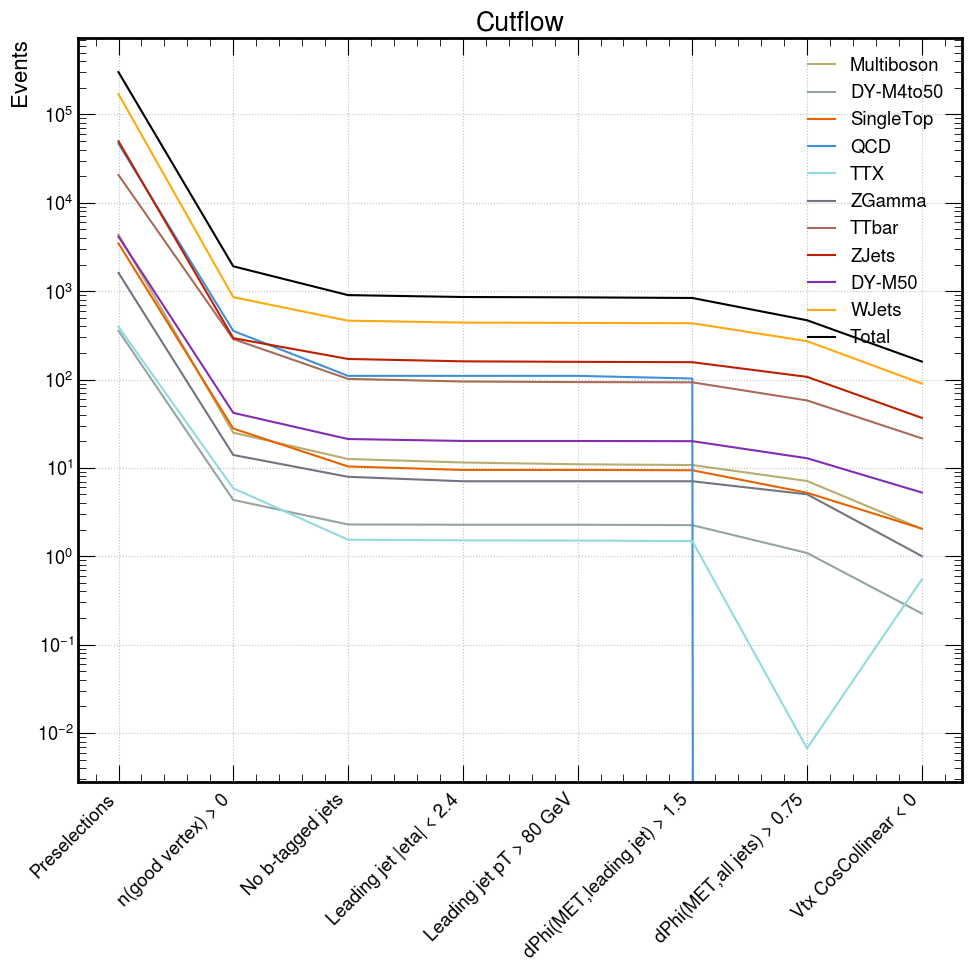

In [21]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

In [22]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                 552,596.0
n(good vertex) > 0              4,119.0
No b-tagged jets                1,551.0
Leading jet |eta| < 2.4         1,328.0
Leading jet pT > 80 GeV         1,319.0
dPhi(MET,leading jet) > 1.5     1,301.0
dPhi(MET,all jets) > 0.75         724.0
Vtx CosCollinear < 0              281.0
Name: Total, dtype: float64

In [23]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx CosCollinear < 0
Multiboson,"4,368.8",25.0,12.6,11.5,11.0,10.8,7.1,2.0
DY-M4to50,356.2,4.3,2.3,2.3,2.3,2.2,1.1,0.2
SingleTop,"3,464.6",27.8,10.4,9.5,9.5,9.4,5.2,2.1
QCD,"46,462.4",354.9,110.0,110.0,110.0,102.6,0.0,0.0
TTX,394.8,5.9,1.5,1.5,1.5,1.5,0.0,0.5
ZGamma,"1,609.7",14.0,7.9,7.1,7.1,7.1,5.0,1.0
TTbar,"20,616.5",286.9,101.6,95.0,93.5,92.9,58.0,21.6
ZJets,"49,631.8",293.8,170.8,160.6,158.5,157.1,107.1,36.8
DY-M50,"4,144.2",42.0,21.2,20.2,20.2,20.1,12.9,5.3
WJets,"169,595.4",855.2,463.0,440.6,437.3,433.2,271.7,90.1


Saved: ./plots/VR_bugHEMveto/cutflow//Cutflow_background.png


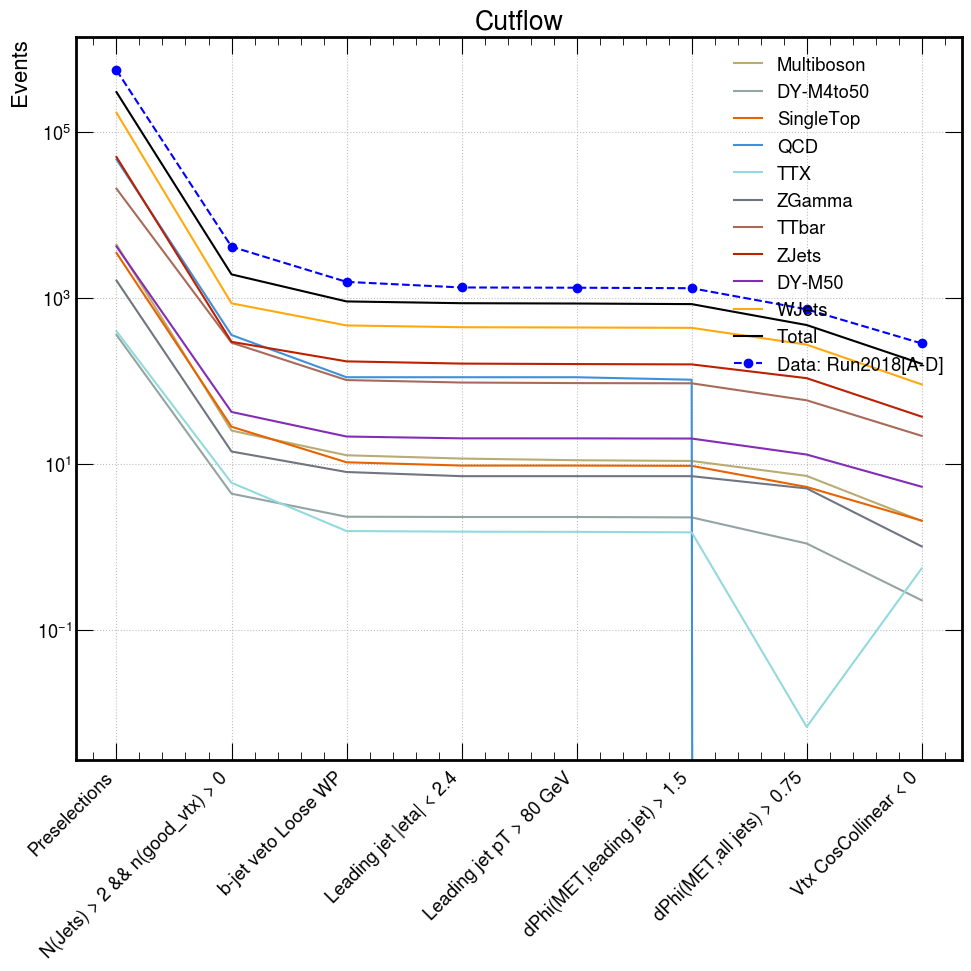

In [24]:
cmap = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"] # cms-recommended
bkg_cmap = {
    "QCD": cmap[0],
    "WJets": cmap[1],
    "ZJets": cmap[2],
    "DY-M4to50": cmap[3],
    "DY-M50": cmap[4],
    "TTbar": cmap[5],
    "SingleTop": cmap[6],
    "Multiboson": cmap[7],
    "ZGamma": cmap[8],
    "TTX": cmap[9]
}

df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
processes = df.index.values.tolist()

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good_vtx) > 0'
cuts[2] = 'b-jet veto Loose WP'

# Color map for each process
for process in processes:
    if 'Total' in process:
        plt.plot(cuts, df.loc[process], label=process, color='black')
    else:
        plt.plot(cuts, df.loc[process], label=process, color = bkg_cmap[process])

# plot data
df_data = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
plt.plot(cuts, df_data.loc['Total'], label='Data: Run2018[A-D]', color = 'blue', marker='o', linestyle='--')

if plot_dict_bkg_eff['doLog']:
    plt.yscale('log')

if plot_dict_bkg_eff['ylim'] != None:
    plt.ylim(plot_dict_bkg_eff['ylim'][0], plot_dict_bkg_eff['ylim'][1])
    
plt.grid()
    
plt.ylabel(plot_dict_bkg_eff['ylabel'])
plt.title(plot_dict_bkg_eff['title'])
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
plt.legend(loc='upper right')
    
if plot_dict_bkg_eff['doSave']:
    os.makedirs(plot_dict_bkg_eff['outDir'], exist_ok=True)
    plt.tight_layout()
    plt.savefig(f"{plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    print(f"Saved: {plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    
plt.show()

## S/sqrt(B)

In [ ]:
# S/sqrt(B) cutflow
pd.options.display.float_format = '{:,.5f}'.format
utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

In [ ]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

In [ ]:
df = utils.get_s_over_sqrtB_cutflow_dict(sig_histo, bkg_histo)

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': r"S/sqrt(B)", # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR_s_over_b_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

#### S/sqrt(B) at the end of the cutflow

In [ ]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

In [ ]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

In [ ]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

In [ ]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [ ]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

In [ ]:
outdir = './csv/SR_Yields/'
outname = f'VR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

### ctau = 1mm

In [ ]:
ct = 1.0

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

### ctau = 10mm

In [ ]:
ct = 10.0

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

### ctau = 100mm

In [ ]:
ct = 100.0

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show